In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans,silhouette_score

In [2]:
from tslearn_test import TSA64K

In [3]:
method = 'dtw'

LMP_data = 'Example_LMP_test.csv'
dispatch_data = 'Example_dispatch_test.csv'

tsa_task = TSA64K(LMP_data,dispatch_data, method)
lmp_array, dispatch_array = tsa_task.read_data()
train_data = tsa_task.transform_data(lmp_array, dispatch_array)

sc,labels = tsa_task.cluster_data(train_data, 10)

In [4]:
clusters = {}
for i, j in enumerate(labels):
    if j not in clusters:
        clusters[j] = {}
        clusters[j]['lmp'] = []
        clusters[j]['dispatch'] = []
        clusters[j]['lmp'].append(train_data[i][0])
        clusters[j]['dispatch'].append(train_data[i][1])
    else:
        clusters[j]['lmp'].append(train_data[i][0])
        clusters[j]['dispatch'].append(train_data[i][1])

In [5]:
with open('10_clusters.json', 'r') as f:
    cluster_results = json.load(f)
# print(cluster_results)

cen = np.array(cluster_results['model_params']['cluster_centers_'])
time_len = range(24)
# plt.plot(time_len,cen[0][0])
# plt.plot(time_len,cen[1][1])

In [6]:
def plot_results(num):
    f,(ax1,ax2) = plt.subplots(1,2,figsize = ((16,6)))
    for i,j in zip(clusters[num]['lmp'],clusters[num]['dispatch']):
        ax1.plot(time_len,i,'--',c='g', alpha=0.5)
        ax2.plot(time_len,j,'--',c='g', alpha=0.5)
    ax1.set_ylim(0,100)
    ax1.plot(time_len,cen[num][0], '-',c = 'r')
    plt.plot(time_len,cen[num][1], '-',c = 'r')
    plt.show()

    return print('The number of days in the cluster_{} is {}'.format(num,len(clusters[num]['lmp'])))

In [24]:
for i in clusters:
    print('The number of points in cluster_{} is {}'.format(i,len(clusters[i]['lmp'])))


The number of points in cluster_0 is 341
The number of points in cluster_2 is 6
The number of points in cluster_1 is 9
The number of points in cluster_8 is 1
The number of points in cluster_7 is 1
The number of points in cluster_4 is 1
The number of points in cluster_3 is 2
The number of points in cluster_9 is 1
The number of points in cluster_5 is 1
The number of points in cluster_6 is 1


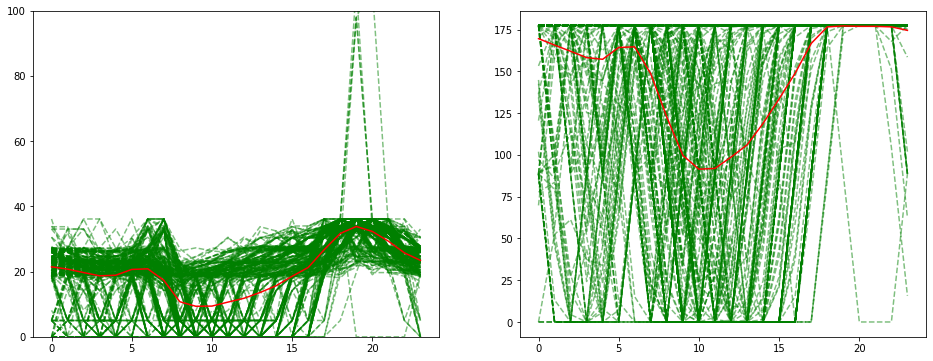

The number of days in the cluster_0 is 341


In [7]:
plot_results(0)

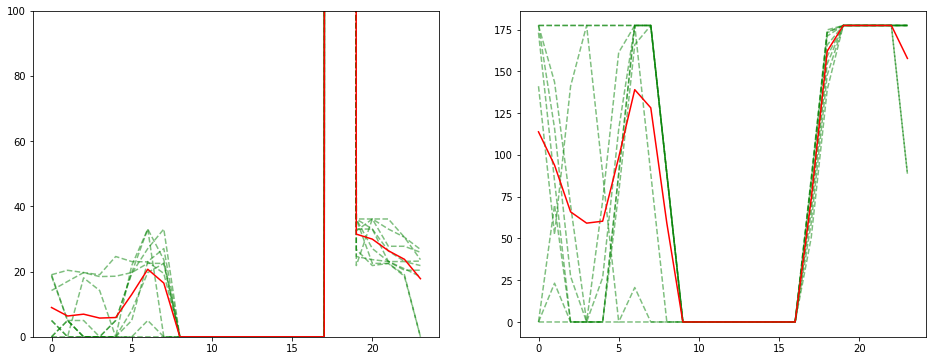

The number of days in the cluster_1 is 9


In [8]:
plot_results(1)

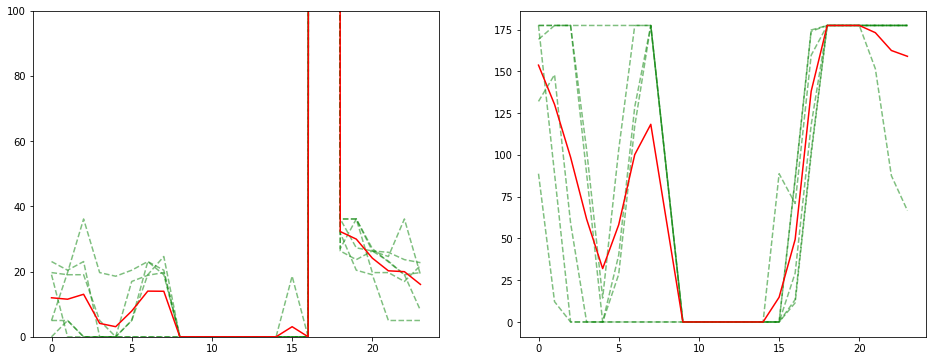

The number of days in the cluster_2 is 6


In [9]:
plot_results(2)

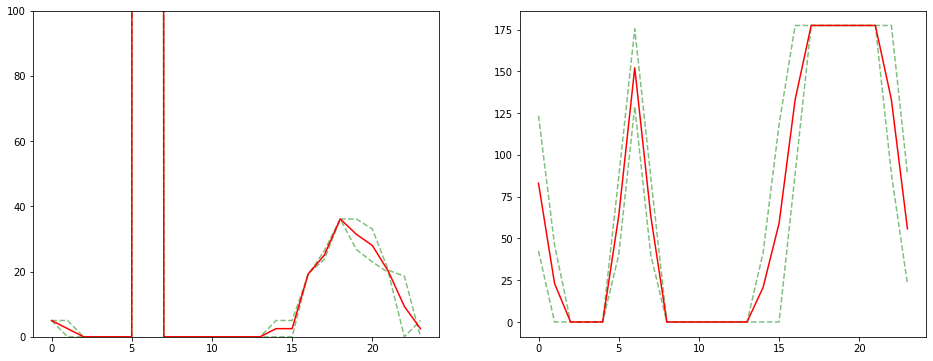

The number of days in the cluster_3 is 2


In [10]:
plot_results(3)

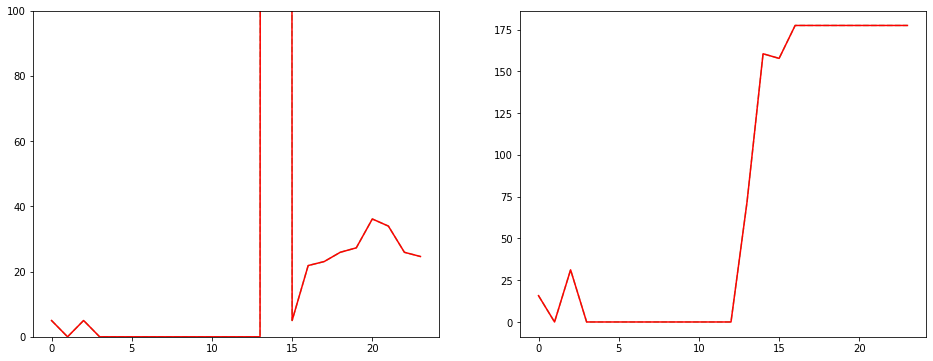

The number of days in the cluster_4 is 1


In [11]:
plot_results(4)

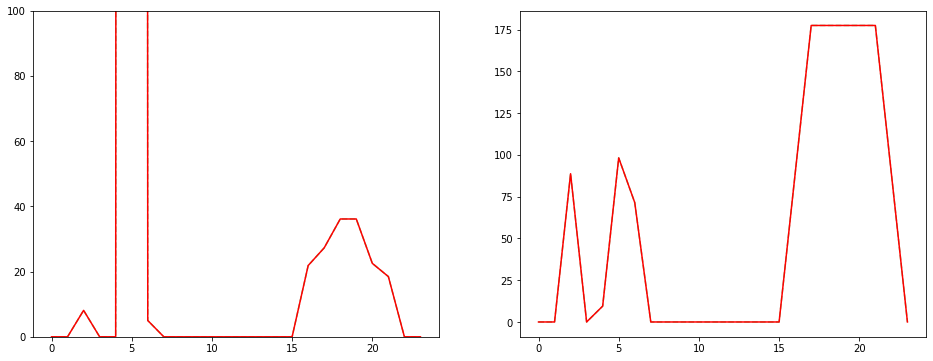

The number of days in the cluster_5 is 1


In [12]:
plot_results(5)